In [1]:
import pandas as pd

In [20]:
df = pd.read_csv("../Datasets/SMSSpamCollection", sep='\t', header=None, names=["label", "text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.shape

(5572, 2)

In [22]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [23]:
import string
def process_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

    

In [24]:
df['cleaned_text'] = df['text'].apply(process_text)

In [25]:
df.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label'].map({'ham': 0, 'spam': 1})


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1115,))

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output scores
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9300
Precision: 1.0000
Recall:    0.4765
F1 Score:  0.6455


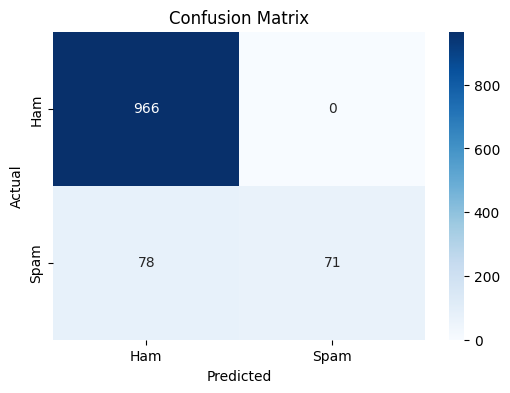

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
import numpy as np

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))
    

In [37]:
accuracies

[0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273,
 0.9300448430493273]

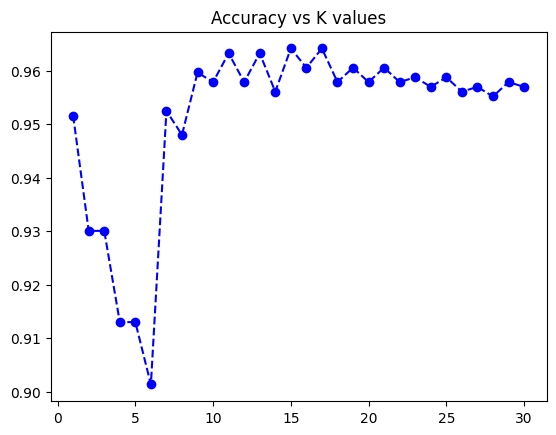

In [44]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, color='blue', marker='o', linestyle='dashed')
plt.title('Accuracy vs K values')
plt.xlabel('K values)
plt.show()